## Imports

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import seaborn as sns
import matplotlib.pyplot as plt

## Data Loading and Merging

In [ ]:
"""Loads data from CSV files and merges them."""
stores_df = pd.read_csv('/content/drive/MyDrive/2024-25/Advanced-Programming-and-Machine-Learning-IITM/final_project/Sales Forecasting/stores.csv')
features_df = pd.read_csv('/content/drive/MyDrive/2024-25/Advanced-Programming-and-Machine-Learning-IITM/final_project/Sales Forecasting/features.csv')
train_df = pd.read_csv('/content/drive/MyDrive/2024-25/Advanced-Programming-and-Machine-Learning-IITM/final_project/Sales Forecasting/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/2024-25/Advanced-Programming-and-Machine-Learning-IITM/final_project/Sales Forecasting/test.csv')

# Merging training data.
train_df = pd.merge(train_df, stores_df)
train_df = pd.merge(train_df, features_df)

# Merging testing data
test_df = pd.merge(test_df, stores_df)
test_df = pd.merge(test_df, features_df)

print(train_df.head(10))
print(test_df.head(10))

# We are considering only sales greater than 0
train_df = train_df[train_df['Weekly_Sales'] > 0]

   Store  Dept        Date  Weekly_Sales  IsHoliday Type    Size  Temperature  \
0      1     1  2010-02-05      24924.50      False    A  151315        42.31   
1      1     2  2010-02-05      50605.27      False    A  151315        42.31   
2      1     3  2010-02-05      13740.12      False    A  151315        42.31   
3      1     4  2010-02-05      39954.04      False    A  151315        42.31   
4      1     5  2010-02-05      32229.38      False    A  151315        42.31   
5      1     6  2010-02-05       5749.03      False    A  151315        42.31   
6      1     7  2010-02-05      21084.08      False    A  151315        42.31   
7      1     8  2010-02-05      40129.01      False    A  151315        42.31   
8      1     9  2010-02-05      16930.99      False    A  151315        42.31   
9      1    10  2010-02-05      30721.50      False    A  151315        42.31   

   Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0       2.572        NaN        NaN 

## Data Exploration and Analysis

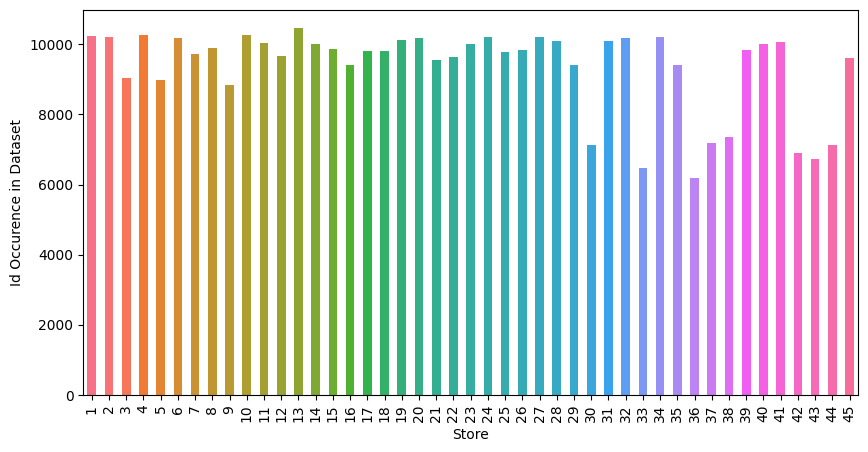

In [ ]:
# Stores occurence distribution in dataset
store_counts = train_df['Store'].value_counts()
colors = sns.color_palette('husl', len(store_counts))
ax = store_counts.sort_index().plot(kind='bar', figsize=(10, 5), color=colors)
plt.ylabel('Id Occurence in Dataset')
plt.xticks(rotation=90)
plt.show()

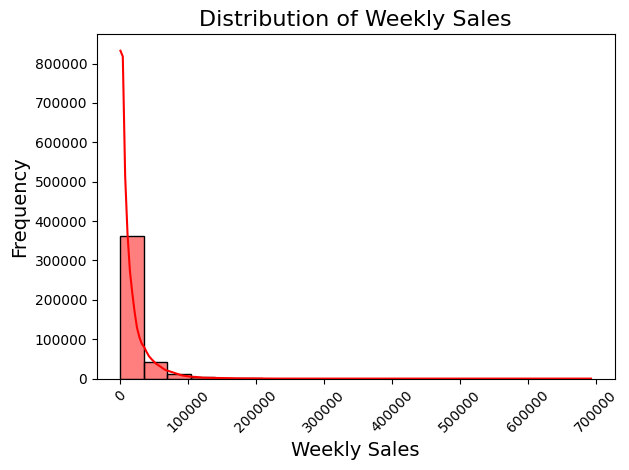

In [ ]:
# Distribution of weekly sales and frequency in test dataset
sns.histplot(
  x=train_df.Weekly_Sales,
  kde=True,
  color='red',
  line_kws={'color': 'red'},
  bins=20,
  edgecolor='black',
  linewidth=1
)

plt.title('Distribution of Weekly Sales', fontsize=16)
plt.xlabel('Weekly Sales', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-51-0d4394241963>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


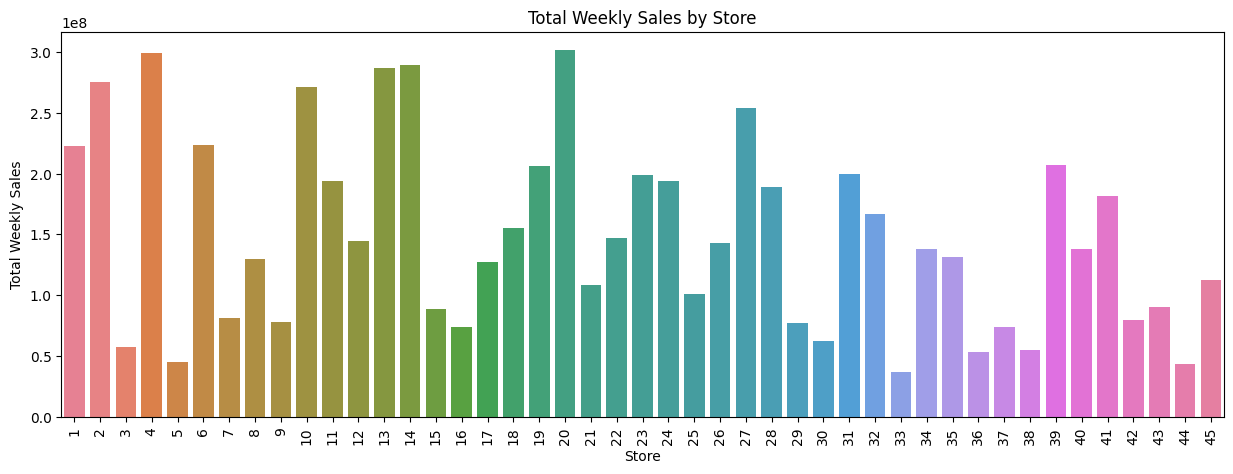

In [ ]:
# Stores and weekly sales distribution plot
grouped_df = train_df.groupby('Store')['Weekly_Sales'].sum().reset_index()
grouped_df = grouped_df.sort_values('Store')
num_stores = len(grouped_df['Store'].unique())
colors = sns.color_palette('husl', num_stores)
plt.figure(figsize=(15, 5))

sns.barplot(
  x='Store',
  y='Weekly_Sales',
  data=grouped_df,
  palette=colors
)

plt.xticks(rotation=90)
plt.title('Total Weekly Sales by Store')
plt.xlabel('Store')
plt.ylabel('Total Weekly Sales')
plt.show()

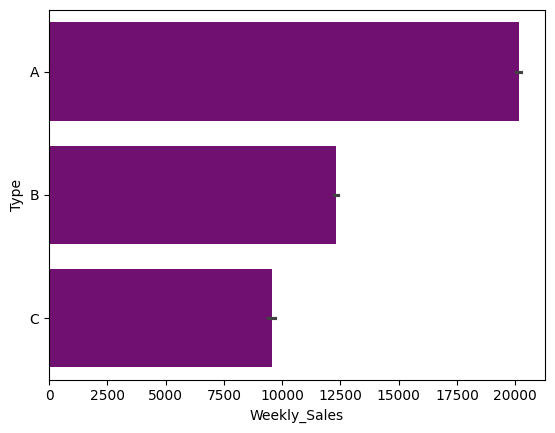

In [ ]:
# weekly sales plot with respective to store
sns.barplot(x=train_df["Weekly_Sales"], y=train_df["Type"],color='purple')
plt.show()

<ipython-input-53-eab55f01bc53>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


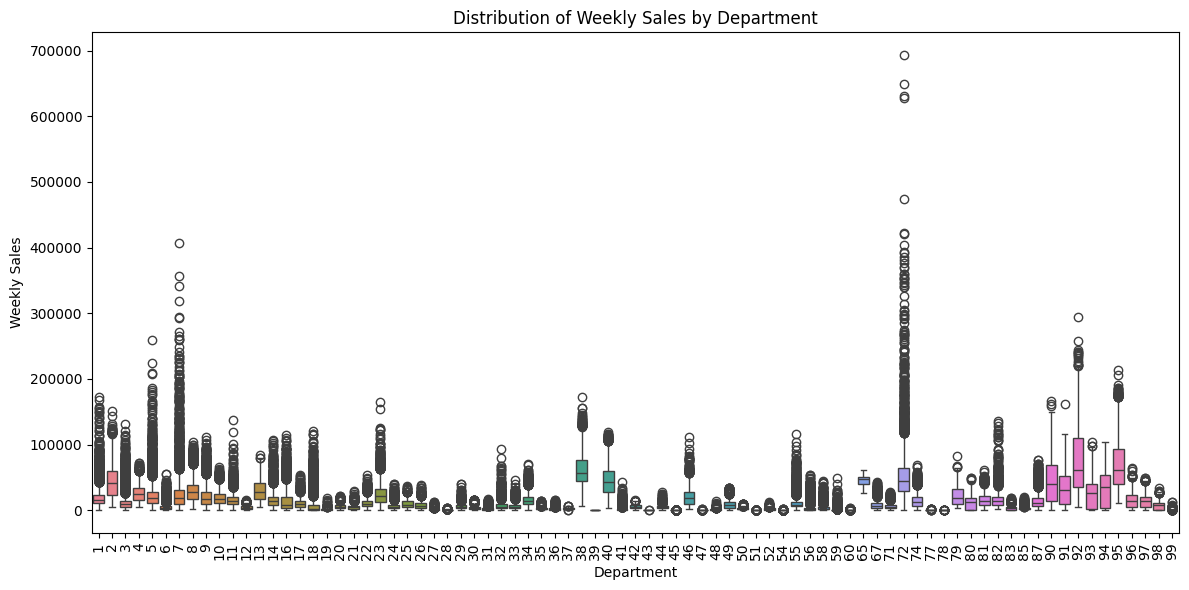

In [ ]:
# Distribution of sales within each department.
plt.figure(figsize=(12, 6))
sns.boxplot(
  x='Dept',
  y='Weekly_Sales',
  data=train_df,
  palette='husl'
)

plt.xticks(rotation=90)
plt.title('Distribution of Weekly Sales by Department')
plt.xlabel('Department')
plt.ylabel('Weekly Sales')
plt.tight_layout()
plt.show()

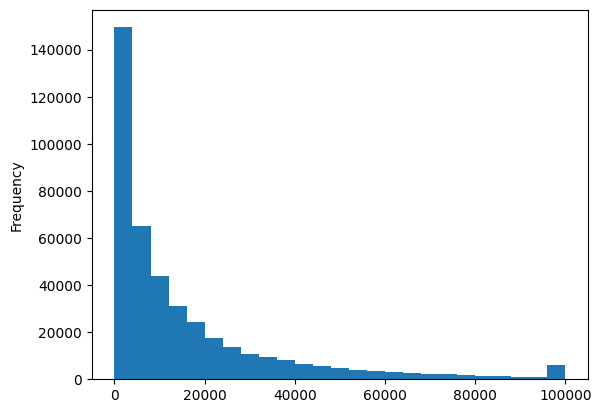

In [ ]:
train_df.Weekly_Sales = np.where(train_df.Weekly_Sales > 100000, 100000, train_df.Weekly_Sales)
train_df.Weekly_Sales.plot.hist(bins=25)
plt.show()

## Data Preprocessing

In [ ]:
"""Preprocesses the training and test data."""
print(train_df.isnull().sum())
print("*" * 30)
print(test_df.isnull().sum())

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270031
MarkDown2       309308
MarkDown3       283561
MarkDown4       285694
MarkDown5       269283
CPI                  0
Unemployment         0
dtype: int64
******************************
Store               0
Dept                0
Date                0
IsHoliday           0
Type                0
Size                0
Temperature         0
Fuel_Price          0
MarkDown1         149
MarkDown2       28627
MarkDown3        9829
MarkDown4       12888
MarkDown5           0
CPI             38162
Unemployment    38162
dtype: int64


In [ ]:
train_df = train_df.fillna(0)
test_df = test_df.fillna(0)

print(train_df.isnull().sum())
print("*" * 30)
print(test_df.isnull().sum())

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64
******************************
Store           0
Dept            0
Date            0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64


In [ ]:
train_df['Date'] = pd.to_datetime(train_df['Date'])
test_df['Date'] = pd.to_datetime(test_df['Date'])
# Extract date features
for df in [train_df, test_df]:
  df['Date_dayofweek'] = df['Date'].dt.dayofweek
  df['Date_month'] = df['Date'].dt.month
  df['Date_year'] = df['Date'].dt.year
  df['Date_day'] = df['Date'].dt.day

In [ ]:
# Type Feature Details
print(train_df.Type.value_counts())
print("*" * 30)
print(test_df.Type.value_counts())

Type
A    214961
B    162787
C     42464
Name: count, dtype: int64
******************************
Type
A    58713
B    44500
C    11851
Name: count, dtype: int64


In [ ]:
# IsHoliday Feature Details
print(train_df.IsHoliday.value_counts())
print("*" * 30)
print(test_df.IsHoliday.value_counts())

IsHoliday
False    390652
True      29560
Name: count, dtype: int64
******************************
IsHoliday
False    106136
True       8928
Name: count, dtype: int64


In [ ]:
# Converting Categorical Variable 'Type' into Numerical Variable
type_mapping = {"A": 1, "B": 2, "C": 3}
for df in [train_df, test_df]:
  df['Type'] = df['Type'].map(type_mapping)

In [ ]:
# Converting Categorical Variable 'IsHoliday' into Numerical Variable
type_mapping = {False: 0, True: 1}
for df in [train_df, test_df]:
  df['IsHoliday'] = df['IsHoliday'].map(type_mapping)

In [ ]:
# dictionary of holidays and their corresponding dates
holidays = {
  "Super_Bowl": [datetime(2010, 2, 12), datetime(2011, 2, 11), datetime(2012, 2, 10), datetime(2013, 2, 8)],
  "Labour_Day": [datetime(2010, 9, 10), datetime(2011, 9, 9), datetime(2012, 9, 7), datetime(2013, 9, 6)],
  "Thanksgiving": [datetime(2010, 11, 26), datetime(2011, 11, 25), datetime(2012, 11, 23), datetime(2013, 11, 29)],
  "Christmas": [datetime(2010, 12, 31), datetime(2011, 12, 30), datetime(2012, 12, 28), datetime(2013, 12, 27)]
}

# loop through each holiday and add a new column for it
for holiday_name, holiday_dates in holidays.items():
  for df in [train_df, test_df]:
    df[holiday_name] = df['Date'].isin(holiday_dates).astype(int)

# update IsHoliday column
for df in [train_df, test_df]:
  for holiday_name in holidays.keys():
    df['IsHoliday'] = df['IsHoliday'] | df[holiday_name]

In [ ]:
# Count of holiday for Test data
print(train_df.Christmas.value_counts())
print(train_df.Super_Bowl.value_counts())
print(train_df.Thanksgiving.value_counts())
print(train_df.Labour_Day.value_counts())
print("*" * 30)
# Count of holiday for train data
print(test_df.Christmas.value_counts())
print(test_df.Super_Bowl.value_counts())
print(test_df.Thanksgiving.value_counts())
print(test_df.Labour_Day.value_counts())

Christmas
0    414303
1      5909
Name: count, dtype: int64
Super_Bowl
0    411339
1      8873
Name: count, dtype: int64
Thanksgiving
0    414266
1      5946
Name: count, dtype: int64
Labour_Day
0    411380
1      8832
Name: count, dtype: int64
******************************
Christmas
0    112076
1      2988
Name: count, dtype: int64
Super_Bowl
0    112100
1      2964
Name: count, dtype: int64
Thanksgiving
0    112088
1      2976
Name: count, dtype: int64
Labour_Day
0    115064
Name: count, dtype: int64


In [ ]:
# Drop extra holiday features
drop_columns = ['Super_Bowl', 'Labour_Day', 'Thanksgiving', 'Christmas']
train_df.drop(drop_columns, axis=1, inplace=True)
test_df.drop(drop_columns, axis=1, inplace=True)

In [ ]:
# Drop irrelevant features
features_drop = ['Unemployment', 'CPI', 'MarkDown5']
train_df = train_df.drop(features_drop, axis=1)
test_df = test_df.drop(features_drop, axis=1)

In [ ]:
# Convert float variables to integer
for var in train_df:
  if train_df[var].dtypes == float:
    train_df[var] = train_df[var].astype(int)
for var in test_df:
  if test_df[var].dtypes == float:
    test_df[var] = test_df[var].astype(int)

## Build the model

In [ ]:
"""Trains a Random Forest Regressor model."""
X = train_df.drop(['Weekly_Sales', 'Date'], axis=1)
y = train_df['Weekly_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=90)
rf_model.fit(X_train, y_train)

gbr_model = GradientBoostingRegressor()
gbr_model.fit(X_train, y_train)

xgbr_model = XGBRegressor()
xgbr_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## Measure the model performance with error rates

In [ ]:
"""Evaluates the model performance on both training and test data."""
# Random Forest metrics
y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)

print(f'R2 train score for Random Forest model: {r2_train}')
print(f'R2 test score for Random Forest model: {r2_test}')
print(f"Training RMSE for Random Forest model: {train_rmse}")
print(f"Test RMSE for Random Forest model: {test_rmse}")
print('*'*40)
# Gradient Boost Regression metrics
y_pred_train = gbr_model.predict(X_train)
y_pred_test = gbr_model.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
print(f'R2 train score for Gradient Boost Regression model: {r2_train}')
print(f'R2 test score for Gradient Boost Regression model: {r2_test}')
print(f"Training RMSE for Gradient Boost Regression model: {train_rmse}")
print(f"Test RMSE for Gradient Boost Regression model: {test_rmse}")
print('*'*40)
# XGBRegression metrics
y_pred_train = xgbr_model.predict(X_train)
y_pred_test = xgbr_model.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)

print(f'R2 train score for XGBRegression model: {r2_train}')
print(f'R2 test score for XGBRegression model: {r2_test}')
print(f"Training RMSE for XGBRegression model: {train_rmse}")
print(f"Test RMSE for XGBRegression model: {test_rmse}")

R2 train score for Random Forest model: 0.9974813671176948
R2 test score for Random Forest model: 0.9823755082076555
Training RMSE for Random Forest model: 1027.2689472310738
Test RMSE for Random Forest model: 2731.763733512548
****************************************
R2 train score for Gradient Boost Regression model: 0.7603207234376111
R2 test score for Gradient Boost Regression model: 0.7612302465590908
Training RMSE for Gradient Boost Regression model: 10021.136281445213
Test RMSE for Gradient Boost Regression model: 10054.8243721401
****************************************
R2 train score for XGBRegression model: 0.9518328978334213
R2 test score for XGBRegression model: 0.9493850804202327
Training RMSE for XGBRegression model: 4492.385173560081
Test RMSE for XGBRegression model: 4629.393625076529
